## Data Preparation

After loading the data, the datatype of REF_DATE was changed to datetime format and the data is trimmed to range from "1986-01-01" till "2024-10-01".

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = "Merged_Time_Series_Data.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Convert REF_DATE to datetime format
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])

# Define the date range
start_date = "1986-01-01"
end_date = "2024-10-01"

# Filter the dataset
df_trimmed = df[(df['REF_DATE'] >= start_date) & (df['REF_DATE'] <= end_date)]

# Display the first few rows of the trimmed dataset
print(df_trimmed.head())

# Save the trimmed dataset if needed
df_trimmed.to_csv("Trimmed_Time_Series_Data.csv", index=False)

       REF_DATE               GEO  Number_of_Households  Housing completions  \
1308 1986-01-01           Alberta                 859.0               4130.0   
1309 1986-01-01  British Columbia                1132.0               9185.0   
1310 1986-01-01            Canada                   NaN              77598.0   
1311 1986-01-01          Manitoba                 392.0               3327.0   
1312 1986-01-01     New Brunswick                 237.0               2190.0   

      Housing starts  Housing under construction  House only NHPI  \
1308          3778.1                      7477.0             28.0   
1309         11098.4                     23454.0             79.5   
1310         71934.4                    211817.0             39.4   
1311          4076.4                     10631.0             37.7   
1312           749.3                      3453.0             75.1   

      Land only NHPI  Total (house and land) NHPI  
1308            22.5                         26.4  


Checking data structure and quality

In [23]:
# Check data structure and quality
print("Dataset Information:")
df_trimmed.info()
print("\nMissing Values:")
print(df_trimmed.isnull().sum())
print("\nBasic Statistics:")
print(df_trimmed.describe())
print("\nUnique Values:")
print(df_trimmed.nunique())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5126 entries, 1308 to 6433
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   REF_DATE                     5126 non-null   datetime64[ns]
 1   GEO                          5126 non-null   object        
 2   Number_of_Households         4660 non-null   float64       
 3   Housing completions          5126 non-null   float64       
 4   Housing starts               5126 non-null   float64       
 5   Housing under construction   5126 non-null   float64       
 6   House only NHPI              5018 non-null   float64       
 7   Land only NHPI               5018 non-null   float64       
 8   Total (house and land) NHPI  5018 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 400.5+ KB

Missing Values:
REF_DATE                         0
GEO                              0


Handle missing values


In [24]:
# Exclude non-numeric columns before performing numerical operations
numeric_cols = df_trimmed.select_dtypes(include=[np.number]).columns

# Interpolation to fill in missing values with a smooth trend, avoiding sudden jumps
df_trimmed[numeric_cols] = df_trimmed[numeric_cols].interpolate(method='linear')

# Fill remaining missing values with the median of each numeric column to prevent extreme values from skewing data
# Handle columns that still have missing values explicitly
for col in numeric_cols:
    if df_trimmed[col].isnull().sum() > 0:
        df_trimmed[col].fillna(df_trimmed[col].median(), inplace=True)


C:\Users\schac\AppData\Local\Temp\ipykernel_30576\2040667778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[numeric_cols] = df_trimmed[numeric_cols].interpolate(method='linear')


In [25]:
# Check data structure after handling missing values
print("Dataset Information: After Handling Missing Values")
df_trimmed.info()
print("\nMissing Values After Handling:")
print(df_trimmed.isnull().sum())

Dataset Information: After Handling Missing Values
<class 'pandas.core.frame.DataFrame'>
Index: 5126 entries, 1308 to 6433
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   REF_DATE                     5126 non-null   datetime64[ns]
 1   GEO                          5126 non-null   object        
 2   Number_of_Households         5126 non-null   float64       
 3   Housing completions          5126 non-null   float64       
 4   Housing starts               5126 non-null   float64       
 5   Housing under construction   5126 non-null   float64       
 6   House only NHPI              5126 non-null   float64       
 7   Land only NHPI               5126 non-null   float64       
 8   Total (house and land) NHPI  5126 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 400.5+ KB

Missing Values After Handling:
REF_DATE                 

## Feature Engineering


In [26]:
# Extract year, month, quarter, and day to enable seasonal and trend analysis
df_trimmed['Year'] = df_trimmed['REF_DATE'].dt.year
df_trimmed['Month'] = df_trimmed['REF_DATE'].dt.month
df_trimmed['Quarter'] = df_trimmed['REF_DATE'].dt.quarter
df_trimmed['Day'] = df_trimmed['REF_DATE'].dt.day

C:\Users\schac\AppData\Local\Temp\ipykernel_30576\2006355810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['Year'] = df_trimmed['REF_DATE'].dt.year
C:\Users\schac\AppData\Local\Temp\ipykernel_30576\2006355810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['Month'] = df_trimmed['REF_DATE'].dt.month
C:\Users\schac\AppData\Local\Temp\ipykernel_30576\2006355810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [27]:
# Check structure after feature engineering
print("Dataset Information: After Feature Engineering")
df_trimmed.info()
df_trimmed.head()


Dataset Information: After Feature Engineering
<class 'pandas.core.frame.DataFrame'>
Index: 5126 entries, 1308 to 6433
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   REF_DATE                     5126 non-null   datetime64[ns]
 1   GEO                          5126 non-null   object        
 2   Number_of_Households         5126 non-null   float64       
 3   Housing completions          5126 non-null   float64       
 4   Housing starts               5126 non-null   float64       
 5   Housing under construction   5126 non-null   float64       
 6   House only NHPI              5126 non-null   float64       
 7   Land only NHPI               5126 non-null   float64       
 8   Total (house and land) NHPI  5126 non-null   float64       
 9   Year                         5126 non-null   int32         
 10  Month                        5126 non-null   int32         
 11

,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI,Year,Month,Quarter,Day
1308,1986-01-01,Alberta,859.0,4130.0,3778.1,7477.0,28.0,22.5,26.4,1986,1,1,1
1309,1986-01-01,British Columbia,1132.0,9185.0,11098.4,23454.0,79.5,49.2,66.3,1986,1,1,1
1310,1986-01-01,Canada,762.0,77598.0,71934.4,211817.0,39.4,38.8,39.8,1986,1,1,1
1311,1986-01-01,Manitoba,392.0,3327.0,4076.4,10631.0,37.7,26.9,34.7,1986,1,1,1
1312,1986-01-01,New Brunswick,237.0,2190.0,749.3,3453.0,75.1,56.1,70.5,1986,1,1,1


Creating Lag Features (Using 1, 3, and 6 months lag).
These help the model recognize past patterns and predict future trends

In [28]:
lag_columns = ['Number_of_Households', 'Housing completions', 'Housing starts',
               'Housing under construction', 'House only NHPI', 'Land only NHPI',
               'Total (house and land) NHPI']

for col in lag_columns:
    for lag in [1, 3, 6]:  # Using past values from 1, 3, and 6 months ago to capture short- and mid-term trends
        df_trimmed[f'{col}_lag_{lag}'] = df_trimmed[col].shift(lag)

C:\Users\schac\AppData\Local\Temp\ipykernel_30576\3796361458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[f'{col}_lag_{lag}'] = df_trimmed[col].shift(lag)
C:\Users\schac\AppData\Local\Temp\ipykernel_30576\3796361458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[f'{col}_lag_{lag}'] = df_trimmed[col].shift(lag)
C:\Users\schac\AppData\Local\Temp\ipykernel_30576\3796361458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [29]:
# Check structure after creating lag features
print("Dataset Information: After Lag Features")
df_trimmed.info()
df_trimmed.head()

Dataset Information: After Lag Features
<class 'pandas.core.frame.DataFrame'>
Index: 5126 entries, 1308 to 6433
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   REF_DATE                           5126 non-null   datetime64[ns]
 1   GEO                                5126 non-null   object        
 2   Number_of_Households               5126 non-null   float64       
 3   Housing completions                5126 non-null   float64       
 4   Housing starts                     5126 non-null   float64       
 5   Housing under construction         5126 non-null   float64       
 6   House only NHPI                    5126 non-null   float64       
 7   Land only NHPI                     5126 non-null   float64       
 8   Total (house and land) NHPI        5126 non-null   float64       
 9   Year                               5126 non-null   int32         
 10

,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI,Year,...,Housing under construction_lag_6,House only NHPI_lag_1,House only NHPI_lag_3,House only NHPI_lag_6,Land only NHPI_lag_1,Land only NHPI_lag_3,Land only NHPI_lag_6,Total (house and land) NHPI_lag_1,Total (house and land) NHPI_lag_3,Total (house and land) NHPI_lag_6
1308,1986-01-01,Alberta,859.0,4130.0,3778.1,7477.0,28.0,22.5,26.4,1986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,1986-01-01,British Columbia,1132.0,9185.0,11098.4,23454.0,79.5,49.2,66.3,1986,...,NaN,28.0,NaN,NaN,22.5,NaN,NaN,26.4,NaN,NaN
1310,1986-01-01,Canada,762.0,77598.0,71934.4,211817.0,39.4,38.8,39.8,1986,...,NaN,79.5,NaN,NaN,49.2,NaN,NaN,66.3,NaN,NaN
1311,1986-01-01,Manitoba,392.0,3327.0,4076.4,10631.0,37.7,26.9,34.7,1986,...,NaN,39.4,28.0,NaN,38.8,22.5,NaN,39.8,26.4,NaN
1312,1986-01-01,New Brunswick,237.0,2190.0,749.3,3453.0,75.1,56.1,70.5,1986,...,NaN,37.7,79.5,NaN,26.9,49.2,NaN,34.7,66.3,NaN


Creating Rolling Mean Features (3-month moving average) which smooths out fluctuations to highlight long-term trends.

In [30]:
for col in lag_columns:
    df_trimmed[f'{col}_rolling_mean_3'] = df_trimmed[col].rolling(window=3).mean()

# Drop rows with NaN values introduced by shifting (since lag features create missing values at the start)
df_trimmed.dropna(inplace=True)

C:\Users\schac\AppData\Local\Temp\ipykernel_30576\606026694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[f'{col}_rolling_mean_3'] = df_trimmed[col].rolling(window=3).mean()
C:\Users\schac\AppData\Local\Temp\ipykernel_30576\606026694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[f'{col}_rolling_mean_3'] = df_trimmed[col].rolling(window=3).mean()
C:\Users\schac\AppData\Local\Temp\ipykernel_30576\606026694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [31]:
print("Dataset Information: After Final Cleaning")
df_trimmed.info()
df_trimmed.head()


Dataset Information: After Final Cleaning
<class 'pandas.core.frame.DataFrame'>
Index: 5120 entries, 1314 to 6433
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   REF_DATE                                    5120 non-null   datetime64[ns]
 1   GEO                                         5120 non-null   object        
 2   Number_of_Households                        5120 non-null   float64       
 3   Housing completions                         5120 non-null   float64       
 4   Housing starts                              5120 non-null   float64       
 5   Housing under construction                  5120 non-null   float64       
 6   House only NHPI                             5120 non-null   float64       
 7   Land only NHPI                              5120 non-null   float64       
 8   Total (house and land) NHPI                 5120

,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI,Year,...,Total (house and land) NHPI_lag_1,Total (house and land) NHPI_lag_3,Total (house and land) NHPI_lag_6,Number_of_Households_rolling_mean_3,Housing completions_rolling_mean_3,Housing starts_rolling_mean_3,Housing under construction_rolling_mean_3,House only NHPI_rolling_mean_3,Land only NHPI_rolling_mean_3,Total (house and land) NHPI_rolling_mean_3
1314,1986-01-01,Nova Scotia,301.0,4263.0,2912.0,7478.0,50.20,51.1,50.7,1986,...,38.7,34.7,26.4,233.000000,2532.666667,1389.666667,5756.000000,54.900000,47.500000,53.300000
1315,1986-01-01,Ontario,3329.0,29410.0,23776.9,85761.0,33.00,44.3,36.7,1986,...,50.7,70.5,66.3,1263.666667,11606.000000,9065.533333,33192.000000,40.866667,43.566667,42.033333
1316,1986-01-01,Prince Edward Island,41.0,559.0,309.1,672.0,36.65,38.6,37.6,1986,...,36.7,38.7,39.8,1223.666667,11410.666667,8999.333333,31303.666667,39.950000,44.666667,41.666667
1317,1986-01-01,Quebec,2421.0,19363.0,22534.8,61534.0,40.30,32.9,38.5,1986,...,37.6,50.7,34.7,1930.333333,16444.000000,15540.266667,49322.333333,36.650000,38.600000,37.600000
1318,1986-01-01,Saskatchewan,365.0,4026.0,2011.0,5020.0,29.90,29.5,29.9,1986,...,38.5,36.7,70.5,942.333333,7982.666667,8284.966667,22408.666667,35.616667,33.666667,35.333333


Plotting time series trends for key variables after missing value handling


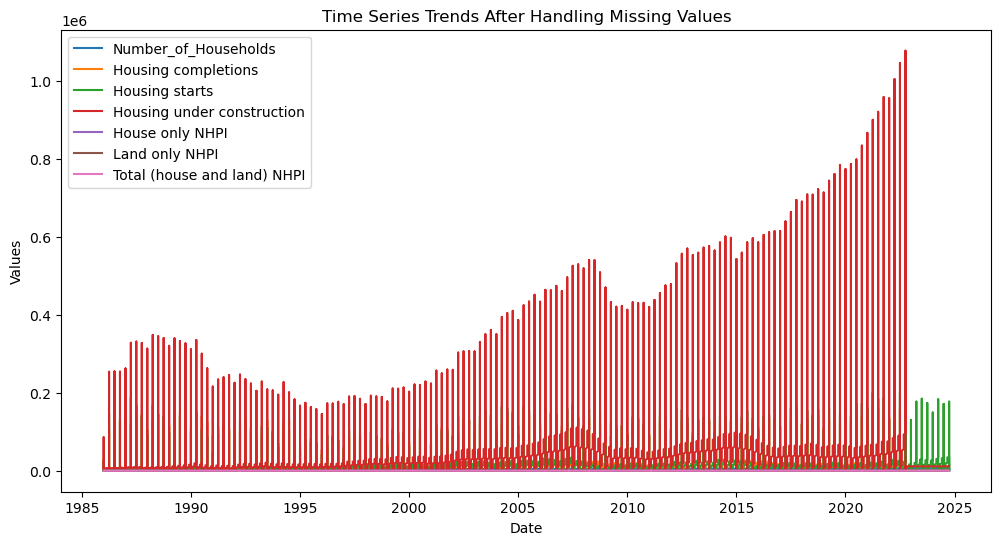

In [33]:
plt.figure(figsize=(12, 6))
for col in lag_columns:
    plt.plot(df_trimmed['REF_DATE'], df_trimmed[col], label=col)
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Time Series Trends After Handling Missing Values")
plt.legend()
plt.show()

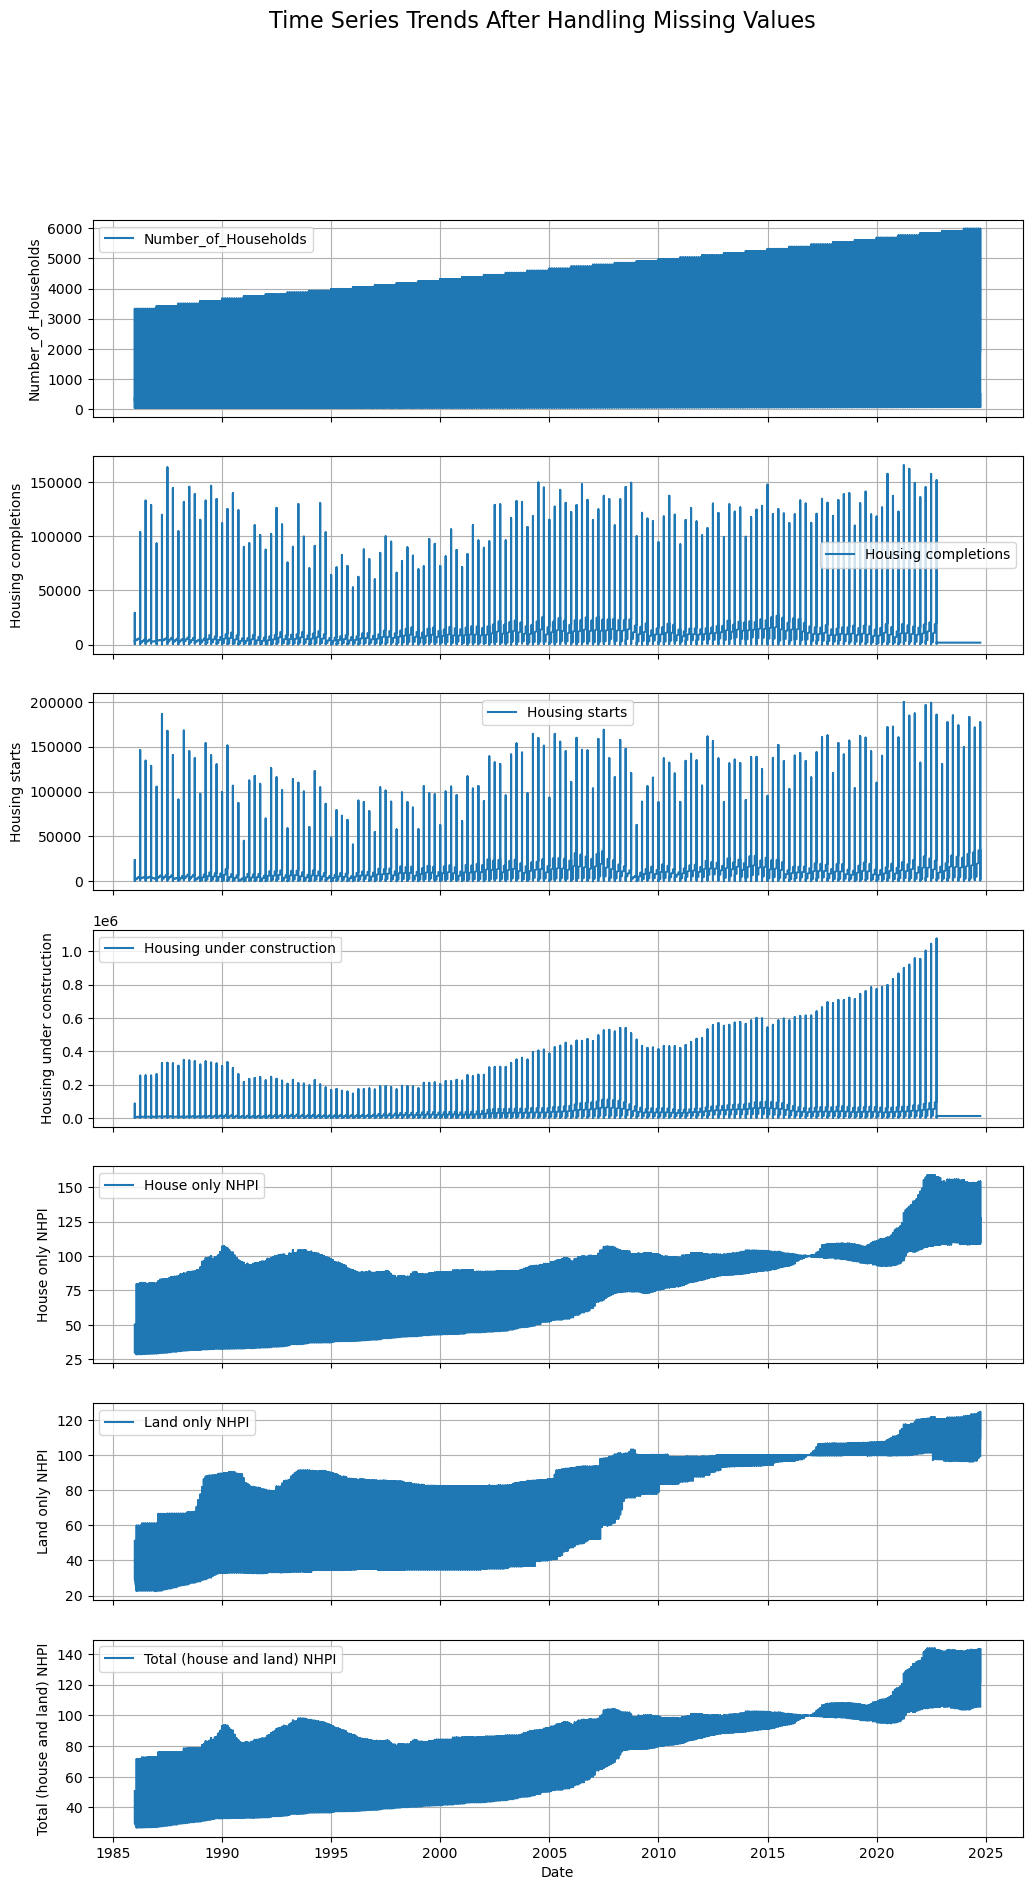

In [34]:
fig, axes = plt.subplots(len(lag_columns), 1, figsize=(12, 3 * len(lag_columns)), sharex=True)
fig.suptitle("Time Series Trends After Handling Missing Values", fontsize=16)

for i, col in enumerate(lag_columns):
    axes[i].plot(df_trimmed['REF_DATE'], df_trimmed[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid()

plt.xlabel("Date")
plt.show()


In [36]:
df_trimmed.head()

,REF_DATE,GEO,Number_of_Households,Housing completions,Housing starts,Housing under construction,House only NHPI,Land only NHPI,Total (house and land) NHPI,Year,...,Total (house and land) NHPI_lag_1,Total (house and land) NHPI_lag_3,Total (house and land) NHPI_lag_6,Number_of_Households_rolling_mean_3,Housing completions_rolling_mean_3,Housing starts_rolling_mean_3,Housing under construction_rolling_mean_3,House only NHPI_rolling_mean_3,Land only NHPI_rolling_mean_3,Total (house and land) NHPI_rolling_mean_3
1314,1986-01-01,Nova Scotia,301.0,4263.0,2912.0,7478.0,50.20,51.1,50.7,1986,...,38.7,34.7,26.4,233.000000,2532.666667,1389.666667,5756.000000,54.900000,47.500000,53.300000
1315,1986-01-01,Ontario,3329.0,29410.0,23776.9,85761.0,33.00,44.3,36.7,1986,...,50.7,70.5,66.3,1263.666667,11606.000000,9065.533333,33192.000000,40.866667,43.566667,42.033333
1316,1986-01-01,Prince Edward Island,41.0,559.0,309.1,672.0,36.65,38.6,37.6,1986,...,36.7,38.7,39.8,1223.666667,11410.666667,8999.333333,31303.666667,39.950000,44.666667,41.666667
1317,1986-01-01,Quebec,2421.0,19363.0,22534.8,61534.0,40.30,32.9,38.5,1986,...,37.6,50.7,34.7,1930.333333,16444.000000,15540.266667,49322.333333,36.650000,38.600000,37.600000
1318,1986-01-01,Saskatchewan,365.0,4026.0,2011.0,5020.0,29.90,29.5,29.9,1986,...,38.5,36.7,70.5,942.333333,7982.666667,8284.966667,22408.666667,35.616667,33.666667,35.333333


 Saving the cleaned dataset to avoid reprocessing later

In [40]:
#df_trimmed.to_csv("Processed_Time_Series_Data.csv", index=False)